Name : **Amir** **Mashmool** Matricola : 5245307   Project : Naive Bayes algorithm

# Naive Bayes Classifier
## Theory of Naive Bayes Algorithm | Advantage and Disadvantage 
naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models but coupled with kernel density estimation, they can achieve higher accuracy levels.
Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.


Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

P(class|data) = (P(data|class) * P(class)) / P(data)
Where P(class|data) is the probability of class given the provided data.


Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes or idiot Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.
Rather than attempting to calculate the probabilities of each attribute value, they are assumed to be conditionally independent given the class value.
This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.


For some types of probability models, naive Bayes classifiers can be trained very efficiently in a supervised learning setting. In many practical applications, parameter estimation for naive Bayes models uses the method of maximum likelihood; in other words, one can work with the naive Bayes model without accepting Bayesian probability or using any Bayesian methods.
Despite their naive design and apparently oversimplified assumptions, naive Bayes classifiers have worked quite well in many complex real-world situations. 

* <b>Advantage: </b>
An advantage of naive Bayes is that it only requires a small number of training data to estimate the parameters necessary for classification, easy to implement,good result obtained in many cases

* <b>Disadvantage: </b> strong assumption: class conditional independencies. How to deal with these dependencies? the answer is Bayesian Networks.




### Import necessary libraries

In [1]:
import numpy as np
from math import sqrt
from math import pi
from math import exp
from random import randrange
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sys

### Generating synthetic data + Adding noise to the data.

In [2]:
def mixGauss(means, sigmas, n):

    means = np.array(means)
    sigmas = np.array(sigmas)
    d = means.shape[1]
    num_classes = sigmas.size
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2,
                                                                   size=n)
        labels[idx * n:(idx + 1) * n] = idx
        #labels[idx * n:(idx + 1) * n] = random.choice([-1,1])
        
    if(num_classes == 2):
        labels[labels==0] = -1
    dataset=[]
    for idx,value in enumerate(data):
        temp=[]
        for v in value:
            temp.append(v)
        temp.append(int(labels[idx]))
        dataset.append(temp)
    #print('i am dataset\n',dataset)
    return dataset

def flipLabels(Y, perc):

    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy


In [3]:
result=mixGauss([[0,0], [1,1]], [0.25, 0.25], 5)
print('Here is the dataset\n',result)
labels=[]
for data in result:
    labels.append(data[-1])
result_noisy=flipLabels(labels,30)
print(result_noisy)
for idx,item in enumerate(result_noisy):
    result[idx][-1]=item
print('After Noising\n',result)

Here is the dataset
 [[0.15730598231009163, 0.025322138182509807, -1], [-0.27969063361942326, 0.02794232964687921, -1], [0.06254253005408607, -0.30511321618475035, -1], [-0.2375521883198923, -0.3480239676871119, -1], [0.07165805245390094, 0.059629296344857786, -1], [0.7668175947829505, 1.1615951764820713, 1], [1.0578010808803657, 0.8038083698523294, 1], [1.078043848211549, 0.7499212635967103, 1], [1.1798479255163692, 1.2423329675525425, 1], [0.7526865987286712, 1.1297104548115318, 1]]
[-1  1 -1 -1  1  1  1 -1  1  1]
After Noising
 [[0.15730598231009163, 0.025322138182509807, -1], [-0.27969063361942326, 0.02794232964687921, 1], [0.06254253005408607, -0.30511321618475035, -1], [-0.2375521883198923, -0.3480239676871119, -1], [0.07165805245390094, 0.059629296344857786, 1], [0.7668175947829505, 1.1615951764820713, 1], [1.0578010808803657, 0.8038083698523294, 1], [1.078043848211549, 0.7499212635967103, -1], [1.1798479255163692, 1.2423329675525425, 1], [0.7526865987286712, 1.1297104548115318,

## Separate By Class

We will need to **calculate the probability of data by the class** they belong to.
This means that we will first need to separate our training data by class.
Below is a function named separate_by_class() that implements this approach. It assumes that the last column in each row is the class value.

-1
[0.22668532294874844, 0.2140503708173592, -1]
[-0.025275271205091657, 0.1971863930859254, -1]
[-0.13322703452730886, -0.29874322169779666, -1]
[0.15443183715334538, -0.0905051698762556, -1]
[0.11506940382455229, -0.07325877251898841, -1]
1
[0.7355002324974349, 1.0369066677135572, 1]
[1.015597299893482, 1.1495840127056058, 1]
[0.9957992111537459, 0.9950938436315646, 1]
[0.9550493368396128, 1.0827207868525432, 1]
[0.8073275318868973, 1.0367738594020286, 1]


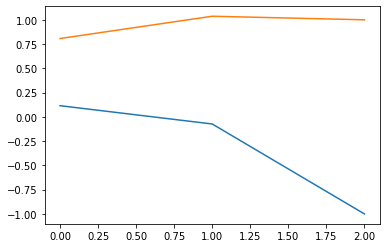

In [4]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

#(just for test)
# Test separating data by class 
dataset = mixGauss([[0,0], [1,1]], [0.25, 0.25], 5)
separated = separate_by_class(dataset)
for label in separated:
	print(label)
	for row in separated[label]:
		print(row)
	plt.plot(row) # plot the data and use separate colors for each class


##Summarize Data
We need to calculate the standard deviation and mean.
The mean is the average value and can be calculated as:

mean = sum(x)/n * count(x)

The sample standard deviation is calculated as the mean difference from the mean value. This can be calculated as:

standard deviation = sqrt((sum i to N (x_i – mean(x))^2) / N-1)

In [5]:

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
#We require the mean and standard deviation statistics to be calculated for each input attribute or each column of our data.
def summarize_dataset(dataset):
  summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
  del(summaries[-1])
  return summaries


#(just for test)
# Test separating data by class 
summary = summarize_dataset(dataset)
print(summary)




[(0.48469578704654187, 0.45770880286120624, 10), (0.5249808770115544, 0.5836257651664712, 10)]


we can see that the mean value and the standard deviation.

##Summarize Data By Class

-1
(0.06753685163884912, 0.14496425945768993, 5)
(-0.01025408003795122, 0.21620583370590407, 5)
1
(0.9018547224542346, 0.12369500188415612, 5)
(1.06021583406106, 0.05879383748238387, 5)


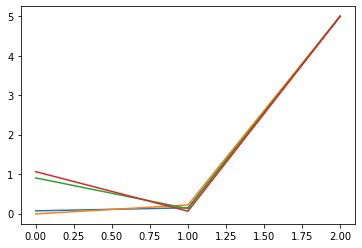

In [6]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

#(just for test)
# Test summarizing by class
summary = summarize_by_class(dataset)
for label in summary:
	print(label)
	for row in summary[label]:
		print(row)
		plt.plot(row) # plot the data


##Gaussian Probability Density Function
Gaussian Probability Distribution Function (or Gaussian PDF) and can be calculated as:

f(x) = (1 / sqrt(2 * PI) * sigma) * exp(-((x-mean)^2 / (2 * sigma^2)))

Where sigma is the standard deviation for x, mean is the mean for x and PI is the value of pi.

In [7]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

#(just for test)
# Test Gaussian PDF(probability distribution function)
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337


##Class Probabilities
Probabilities are calculated separately for each class. This means that we first calculate the probability that a new piece of data belongs to the first class, then calculate probabilities that it belongs to the second class, and so on for all the classes.

The probability that a piece of data belongs to a class is calculated as follows:

P(class|data) = P(X|class) * P(class)
The division has been removed to simplify the calculation.
The input variables are treated separately, giving the technique its name **“naive“**. For the above example where we have 2 input variables, the calculation of the probability that a row belongs to the first-class 0 can be calculated as:
P(class=0|X1,X2) = P(X1|class=0) * P(X2|class=0) * P(class=0)

In [8]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

#(just for test)
# Test calculating class probabilities
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])
print(probabilities)

{-1: 0.811375383335819, 1: 3.903152392814327e-51}


We can see that the probability of the first row belonging to the ... class (....) is higher than the probability of it belonging to the ...class (...)

this was the implementation of the Naive Bayes algorithm. let’s learn more and test the algorithm.

##Predication,kfold cross validation,Evaluate the algorithm

In [9]:
# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores


# Naive Bayes Algorithm
def naive_bayes(train, test):
	summarize = summarize_by_class(train)
	predictions = list()
	for row in test:
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)

In [10]:
# Test separating data by class
dataset = mixGauss([[0,0], [1,1]], [0.25, 0.25], 500)
n_folds = 10
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

model = summarize_by_class(dataset)
# define a new record
test = mixGauss([[0,0], [1,1]], [0.25, 0.25], 10)
[j.pop(2) for j in test]
# predict the label
for j in test:
  label = predict(model, j)
  print('Data=%s, Predicted: %s' % (test, label))

Scores: [99.0, 98.0, 99.0, 99.0, 100.0, 100.0, 100.0, 100.0, 99.0, 100.0]
Mean Accuracy: 99.400%
Data=[[-0.05513721645576161, 0.09464460611049587], [-0.058233908633140645, 0.13930584530930123], [-0.029777516214847345, 0.07154184325784839], [-0.2665240403542514, -0.263660926626709], [0.03746710759558996, -0.12237553358967865], [-0.5014780762923394, 0.04215167194967508], [-0.44352196755735096, 0.23542759580616876], [0.3355223056732783, -0.163642495621009], [0.05667972597648851, 0.16615283286372745], [-0.44200105875174855, 0.6033211077749229], [1.0423689433924754, 0.6624310127945576], [0.7502374477229529, 1.2040646034193738], [1.0266062931978086, 1.1678514866369036], [0.7110637550837654, 0.6896343312178859], [1.1332116303096198, 0.5641242681003295], [0.8738097432669231, 0.6717978965343321], [1.0425570602755316, 0.6835605767478694], [1.1171426700072742, 1.637281988287341], [0.7623050244322613, 1.2631974899082812], [0.8424513714670409, 1.0992049045825347]], Predicted: -1
Data=[[-0.055137216